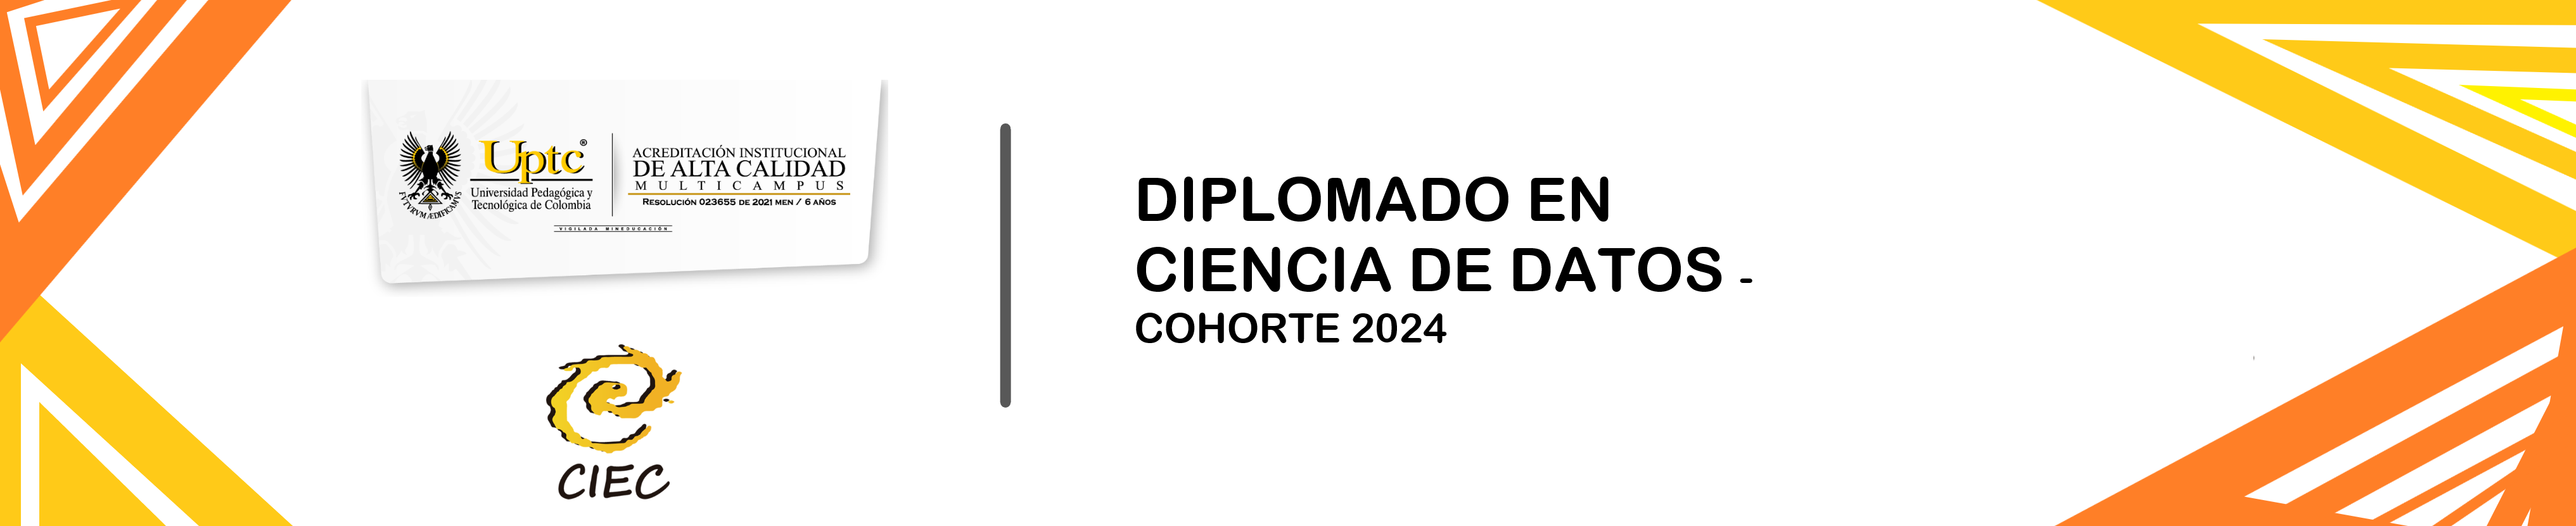

# **Fundamentos de Cálculo Diferencial - Taller Práctico guiado**

Bienvenido al curso "*Fundamentos de Cálculo Diferencial*". En este taller práctico se le pedirá que realice una serie de algoritmos de diferente complejidad donde tendrá que aplicar todos los conocimientos impartidos en clase. Para ayudarle, se le indicará en cada caso una serie de pistas y se le guiará en el proceso de realización del taller ya que el presente ejercicio, consta de la construcción de un algoritmo complejo que le llevará a revisar temas de cálculo y álgebra lineal. El presente taller consta de la construcción de un regresor lineal en varias dimensiones aplicado a un caso de estudio común en Machine Learning: la deducción de precios de inmuebles.

En la presente práctica `Todos los ejercicios` son obligatorios y repercutirán en su calificaición. La dinámica de la presente práctica consiste en completar las líneas de código que están incompletas y su código deberá ir donde aparezcan los tres puntos `...`.


En caso de presentar dudas a cerca de como resolver los ejercicios, puede dirigirse a los docentes encargados y solicitar asesoría. Una vez se haya dado un tiempo prudente para que usted pueda practicar sus habilidades, se hará una retroalimentación a cerca de la solución de los ejercicios aquí formulados durante las sesiones sincrónicas y mediante tutorías debidamente agendadas.

---

##**Algunas recomendaciones**:
Para poder resolver este taller práctico se recomienda lo siguiente:
* Enfréntese a los ejercicios con paciencia y calma, puede ser desafiante dominar el arte de la programación, pero recuerde que el éxito de su práctica dependerá de que tanta atención usted disponga para formular la lógica de su respuesta.
* Si presenta dudas a cerca de que sintaxis debe emplear, diríjase en primera instancia a las notas de clase provístas por el docente, allí encontrará de manera detallada la manera para empezar a proceder.
* En caso de no resolver su duda facilmente a cerca de la sintaxis que necesita para la formulación del problema, diríjase a la documentación en línea correspondiente a Python.
* Es imporante que tenga en cuenta que se le proveerá una estructura básica a seguir en cada ejercicio, en donde cuando vea `...` en el código deberá completar las líneas incompletas siguiendo las instrucciones dadas en cada caso.


# **Contenidos:**

1. **Formulación del problema**
  * Matriz $X$ de datos
  * Vector de parámetros $w$ y $b$
2. **Predicción de un modelo lineal multivariable**
  * Predicción elemeto-a-elemento
  * Predicción vectorizada
3. **Función de costo**
4. **Descenso del gradiente multivariable**

---

# Dependencias

In [ ]:
import numpy as np
import pandas as pd
import copy, math
import matplotlib.pyplot as plt

#**1. Formulación del problema**

Como se vió en clase, la regresión lineal es una tarea de Machine Learning en donde el objetivo es reducir la función de costo que depende de las predicciónes del modelo y de los valores reales de la variable objetivo. Así, la regresión lineal multivariable es un problema de modelamiento a partir de datos que asume que éstos pueden ser explicados a través de una combinación lineal de las características o variables. Antes de proseguir tengamos en cuenta la siguiente notación.

|Notación <img width=70/> <br />  General  <img width=70/> | Descripción<img width=350/>| Python |
|: ------------|: ------------------------------------------------------------||
| $a$ | escalar                                                               ||
| $\mathbf{a}$ | vecto (negrilla)                                             ||
| $\mathbf{A}$ | matriz, negrilla mayuscula                                   ||
| **Regresión** |         |    |     |
|  $\mathbf{X}$ | matriz de ejemplos entrenamiento           | `X_train` |   
|  $\mathbf{y}$  | objetivos ejemplo de entrenamiento           | `y_train`
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{ésimo}$ ejemplo de entrenamiento | `X[i]`, `y[i]`|
| m | número de ejemplos de entrenamiento  | `m`|
| n | número de características en cada ejemplo | `n`|
|  $\mathbf{w}$  |  parámetro: pesos,                       | `w`    |
|  $b$           |  parámetro: bias                                           | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | resultado de evaluación $\mathbf{x^{(i)}}$ parametrizada por $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` |


El objetivo de la presente práctica es predecir el precio de un inmueble a partir de las características del mísmo, tales como el número de habitaciones, número de pisos, edad del inmueble, entre otras. Para realizar ésta tarea usted construirá un modelo de regresión lineal multivariable.
Tenga en cuenta entonces que al tratarse de un problema de múltiples características, la variable $x$ ya no será un vector sino una matriz la cuál se denomina la "matriz de dtos". A continuación encontrará un pequeño ejemplo de cómo pueden lucir sus datos.

In [ ]:
# Ejemplo de los datos de entrenamiento.
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

### 1.1. Matriz $X$ de datos

Los ejemplos de entrenamiento $x_i$ son almacenados en una matriz `X_train` donde cada columna de la matriz representa un ejemplo. Contanto entonces con $m$ ejemplos y $n$ características, si matriz $X$ será una matriz de dimensiones ($m$, $n$) ($m$ filas, $n$ columnas).

$$\mathbf{X} =
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1}
\end{pmatrix}
$$

$$
$$

- $\mathbf{x}^{(i)}$ vector que contiene el ejemplo $i$. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ elemento $j$-ésimo en el ejemplo $i$ in example i. El índice entre paréntesis representa el número del ejemplo mientras que el sub-índice, la componente del vector.

Para la presente práctica, usted usará un dataset real común en la Ciencia de Datos: los precios de inmuebles en Boston. Su tarea en concreto consistirá en completar los algoritmos implicados en el descenso del gradiente de modo tal que pueda ajustar un modelo lineal multivariable a los datos. Una breve descripción de las variables de los datos es la siguiente:
* CRIM: Taza de delincuencia per cápita por pueblo.
* ZN: Proporción de suelo residencial con parcelas de más de 25.000 pies cuadrados.
* INDUS: Proporción de acres comerciales no minoristas por ciudad.
* CHAS: Variable 'ficticia' Charles River (=1 si la zona linda con el río; 0 en caso contrario).
* NOX: Concentración de óxidos nítricos (partes por 10 millones).
* RM: Número medio de habitaciones por vivienda.
* AGE: Proporción de viviendas propias construidas antes de 1940.
* DIS: Distancias ponderadas a cinco centros de empleo de Boston.
* RAD: Índice de accesibilidad a autopistas radiales.
* TAX: Tasa del impuesto sobre bienes inmuebles por cada 10.000 dólares.
* PTRATIO: Proporción alumnos-profesor por pueblo.
* B: 1000(BK - 0,63)^2 donde Bk es la proporción de bloques por pueblo.
* LSTAT: % estatus inferior de la población.
* MEDV: Valor medio de la vivienda ocupada por el propietario en $1000.

Corra la siguiente celda para cargar los datos.

In [ ]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", header=None, sep="\s+")
df.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


A continuación, corra la siguiente celda para tomar solo unas variables de interés, donde nuesta variable objetivo será el precio promedio de la vivienda "MEDV". Note que `X_train` hace referencia a la matriz de datos, la cuál contiene las variables indpendientes o explicativas mientras que `y_train` contiene la variable objetivo.

In [ ]:
cols = ["DIS","INDUS","CRIM","RM"]
X_train = df[cols]
y_train = df["MEDV"]

**Ejercicio 1.1:**

* Determine las dimensiones de la martiz de datos y el vector de entrenamiento mediante el comando `.shape`

In [ ]:

# Programa para encontrar las dimensiones de los datos

# Escriba su código aquí
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)


X Shape: (506, 4), X Type:<class 'pandas.core.frame.DataFrame'>)
        DIS  INDUS     CRIM     RM
0    4.0900   2.31  0.00632  6.575
1    4.9671   7.07  0.02731  6.421
2    4.9671   7.07  0.02729  7.185
3    6.0622   2.18  0.03237  6.998
4    6.0622   2.18  0.06905  7.147
..      ...    ...      ...    ...
501  2.4786  11.93  0.06263  6.593
502  2.2875  11.93  0.04527  6.120
503  2.1675  11.93  0.06076  6.976
504  2.3889  11.93  0.10959  6.794
505  2.5050  11.93  0.04741  6.030

[506 rows x 4 columns]
y Shape: (506,), y Type:<class 'pandas.core.series.Series'>)
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


### 1.2. Vector de parámetros $\mathbf{w}$ y $\mathbf{b}$

* $\mathbf{w}$ es el vector que contiene los parámetros del modelo denominables como "pesps" y está constituido por $n$ elementos.
  - Cada elemento contiene un peso asociado a cada característica.
  - Constituye un vector columna de la forma:

$$\mathbf{w} = \begin{pmatrix}
w_0 \\
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ es un parámetro escalar conocido como el "bias".  

**Ejercicio 1.2:**

* Determine las dimensiones deo los parámetros del modelo mediante el comando `.shape`

In [ ]:

# Programa para encontrar las dimensiones de los parámetros del modelo

# Escriba su código aquí
b_init = 785.181136
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")


w_init shape: (4,), b_init type: <class 'float'>


# **2. Predicción de un modelo lineal multivariable**

En un modelo lineal multivariable, se asume que cada característica es ponderada por una componente $w_j$ tal que la predicción del modelo, resulta ser una combinación lineal de las características ponderadas de los datos más el parámetro bias.

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b $$

Lo cual puede escribirse en forma algebráica como:

$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b $$

En donde $\cdot$ es un producto punto entre el vector de pesos y la matriz de datos.

### 2.1. Predicción elemeto-a-elemento

**Ejercicio 2.1:**

* En el presente ejercicio, usted deberá implementar la predicción del modelo multivariable sin usar el mecanísmo de vectorizar. Para ello realizará los productos necesarios elemento a elemento implementando la función siguiente.

```
Considere además:

Argumentos de la función:
      x (vector): Shape (n,) ejemplo de entrenamiento con múltiples dimensiones
      w (vector): Shape (n,) párámetros del modelo
      b (escalar):  parámetro del modelo bias

Retorno de la función:
      p (escalar):  predicción
```



In [ ]:

# Programa para implementar una predicción lineal multivariable elementoa elemento

def prediccion_el_a_el(x, w, b):
    n = x.shape[0]
    p = 0
    for i in range(n):
        # Escriba su código aqui: complete el producto
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p


# Implementación de la función
X_train = X_train.values
y_train = y_train.values
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec ejemplo: {x_vec}")

f_wb = prediccion_el_a_el(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, predicción: {f_wb}")


x_vec shape (4,), x_vec ejemplo: [4.090e+00 2.310e+00 6.320e-03 6.575e+00]
f_wb shape (), predicción: 656.0455091640704


### 2.2 Predicción vectorizada

**Ejercicio 2.2:**

* En el presente ejercicio, usted deberá implementar la predicción del modelo multivariable usando el mecanísmo de vectorización. Para ello realizará las operaciones algebráicas necesarias.

```
Considere además:

Argumentos de la función:
      x (vector): Shape (n,) ejemplo de entrenamiento con múltiples dimensiones
      w (vector): Shape (n,) párámetros del modelo
      b (escalar):  parámetro del modelo bias

Retorno de la función:
      p (escalar):  predicción
```


In [ ]:

# Programa para implementar una predicción lineal multivariable

def prediccion(x, w, b):
    # Escriba su código aquí: Complete la función
    p = np.dot(x, w) + b
    return p


# Implementación de la función
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec ejemplo: {x_vec}")

# make a prediction
f_wb = prediccion(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, predicción: {f_wb}")


x_vec shape (4,), x_vec ejemplo: [4.090e+00 2.310e+00 6.320e-03 6.575e+00]
f_wb shape (), predicción: 656.0455091640704


#**3. Función de costo**

La ecuación de la función de costo multivariable $J(\mathbf{w},b)$ es muy similar a la univariable, solo que en éste caso la predicción es efectuada mediante operaciones matriciales. Sin embargo, la predicción sigue siendo de carácter escalar.

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$

En dónde como vimos anteriormente, la predicción lineal viene dada por el modelo:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  $$


**Ejercicio 3.1:**

* En el presente ejercicio, usted deberá implementar la función de costo multivariable, para ello se le recomienda implementar un ciclo `for()` que itere sobre los elementos de la matriz de datos y ejecute un producto punto entre el vector de ejemplo $\mathbf{x}^{(i)}$  y el vector de pesos $\mathbf{w}$.

```
Considere además:

Argumentos de la función:
      X (matrix): Shape (m,n) matriz de datos con m ejemplos (filas) y n dimensiones (features o características)
      y (vector): Shape (m,) variable objetivo
      w (vector): Shape (n,) párámetros del modelo
      b (escalar):  parámetro del modelo bias

Retorno de la función:
      costo (escalar):  costo o discrepancia del modelo
```


In [ ]:

# Programa para implementar la función de costo multivariable

def J_cost(X, y, w, b):

    # Escriba su código aquí: Complete la función de costo
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       # escalar
    cost = cost / (2 * m)                      # escalar

    return cost


# Implementación de la función
costo = J_cost(X_train, y_train, w_init, b_init)
print(f'Costo actual bajo parámetros w : {costo}')


Costo actual bajo parámetros w : 276396.3042666728


# **4. Descenso del gradiente multivariable**


De manera similar a la vísta en clase, el descenso del gradiente para una regresión lineal multivariable se basa en la siguiente regla de actualización de parámetros:

$$\begin{align*}   \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{para j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline
\end{align*}$$

Donde $n$ es el número de características y por ende, de parámetros $w_j$ donde el bias $b$ es actualizado con una regla diferente tal que el algoritmo de descenso del gradiente tiene que encontrar $j$ + 1 derivadas parciales de la forma:   

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}   \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align}
$$

* $m$ número de ejemplos (columnas) en el dataset
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ predicción del modelo, mientras que  $y^{(i)}$ corresponde al valor objetivo.


An implementation for calculating the equations (6) and (7) is below. There are many ways to implement this. In this version, there is an

1. Itere sobre los $m$ ejemplos.
2. Calcule el error.
3. Dentro del ciclo, calcule las derivadas parciales y acumule el valor de los gradientes $\frac{\partial J(\mathbf{w},b)}{\partial b}$.
3. En un ciclo aparte, itere sobre las $n$  dimensiones de cada ejemplo y acumule el valor de los gradientes $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$.
4. Promedie el valor de los gradientes de los pesos y el bias al dividir por el número de ejemplos $m$.



**Ejercicio 4.2:**

* En el presente ejercicio, usted deberá implementar el ciclo del descenso del gradiente para una función de costo multivariable, para ello se le recomienda implementar un ciclo `for()` enn donde deberá ejecutar los siguientes pasos:

1. Calcular los gradientes de los parámetros y el bias usando la función `gradiente` del ejercicio anterior.
2. Una vez calculados los gradientes, deberá actualizar los parámetros  $\mathbf{w}$ y $b$ por separado usando el resultado de la función `gradiente`.
3. Regístre el valor del costo en un vector llamado `J_historia`.

```
Considere además:

Argumentos de la función:
      X (matrix): Shape (m,n) matriz de datos con m ejemplos (filas) y n dimensiones (features o características)
      y (vector): Shape (m,) variable objetivo
      w (vector): Shape (n,) párámetros del modelo
      b (escalar):  parámetro del modelo bias

Retorno de la función:
      dj_dw (vector): Shape (n,) gradiente de la función de costo con respecto a los parámetros w
      dj_db (escaler): gradiente de la función de costo con respecto al parámetro bias
```


In [ ]:

# Programa para implementar un gradiente multivariable

def gradiente(X, y, w, b):

    # Escriba su código aquí: Complete las dimensiones de cada inicializacion
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        # Escriba su código aquí: Calcule el error para cada ejemplo
        err = (np.dot(X[i], w) + b) - y[i]

        for j in range(n):
            # Escriba su código aquí: Calcule el el gradiente de los pesos w_j
            dj_dw[j] = dj_dw[j] + err * X[i, j]

        # Escriba su código aquí: Calcule el el gradiente del bias b
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw


# Implementación de la función

tmp_dj_db, tmp_dj_dw = gradiente(X_train, y_train, w_init, b_init)
print(f'dj_db en parámetros iniciales w,b: {tmp_dj_db}')
print(f'dj_dw en parámetros iniciales w,b: \n {tmp_dj_dw}')

dj_db en parámetros iniciales w,b: 614.1229187091079
dj_dw en parámetros iniciales w,b: 
 [ 2494.29908347  6518.78292801 -1209.02833309  3877.38278289]


**Ejercicio 4.2:**

* En el presente ejercicio, usted deberá implementar el ciclo del descenso del gradiente para una función de costo multivariable, para ello se le recomienda implementar un ciclo `for()` enn donde deberá ejecutar los siguientes pasos:

1. Calcular los gradientes de los parámetros y el bias usando la función `gradiente` del ejercicio anterior.
2. Una vez calculados los gradientes, deberá actualizar los parámetros  $\mathbf{w}$ y $b$ por separado usando el resultado de la función `gradiente`.
3. Regístre el valor del costo en un vector llamado `J_historia`.


```
Considere además:

Argumentos de la función:
      X (matrix): Shape (m,n) matriz de datos con m ejemplos (filas) y n dimensiones (features o características)
      y (vector): Shape (m,) variable objetivo
      w (vector): Shape (n,) párámetros del modelo
      b (escalar):  parámetro del modelo bias

Retorno de la función:
      dj_dw (vector): Shape (n,) gradiente de la función de costo con respecto a los parámetros w
      dj_db (escaler): gradiente de la función de costo con respecto al parámetro bias
```


In [ ]:

# Programa para implementar un gradiente descendente multivariable

def descenso_gradiente(X, y, w_in, b_in, funcion_costo, funcion_gradiente, alpha, num_iters):

    J_historia = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):

        # Escriba su código aquí: Calcule el gradiente y actualice los parámetros
        dj_db,dj_dw = funcion_gradiente(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Escriba su código aquí: Guarde el valor actuál de la función de costo
        if i<100000:
            J_historia.append( funcion_costo(X, y, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteración {i:4d}: Costo {J_historia[-1]:8.2f}   ")

    return w, b, J_historia


# implementación de la función
# inicialización de parámetros
inicial_w = np.zeros_like(w_init)
inicial_b = 0.
# hiperparámetros del descenso del gradiente
iterations = 10000
alpha = 5.0e-7 # learning rate

w_final, b_final, J_hist = descenso_gradiente(X_train, y_train, inicial_w, inicial_b,
                                                    J_cost, gradiente,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
#for i in range(m):
#    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")


Iteración    0: Costo   296.03   
Iteración 1000: Costo   259.57   
Iteración 2000: Costo   230.19   
Iteración 3000: Costo   206.42   
Iteración 4000: Costo   187.10   
Iteración 5000: Costo   171.31   
Iteración 6000: Costo   158.32   
Iteración 7000: Costo   147.56   
Iteración 8000: Costo   138.58   
Iteración 9000: Costo   131.02   
b,w found by gradient descent: 0.08,[0.33607053 0.62953268 0.06879438 0.51400936] 


Corra la siguiente celda para observar la historia del proceso de optimización.

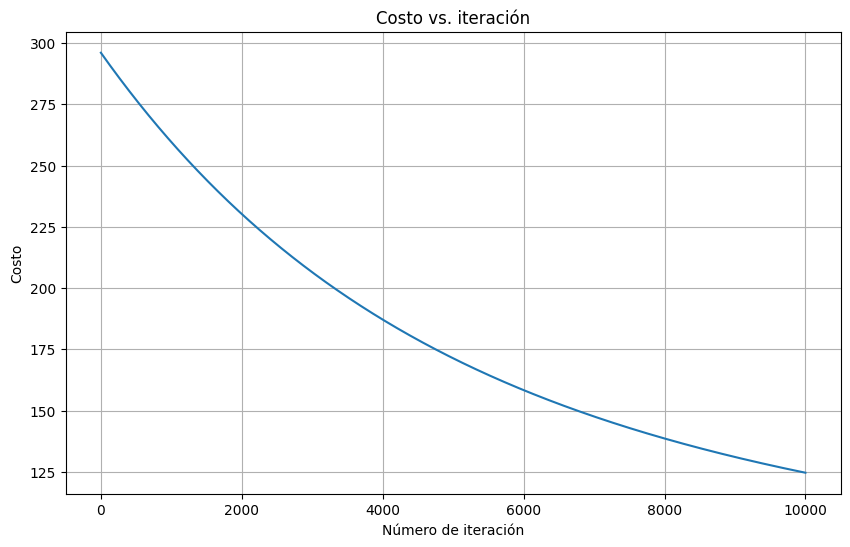

In [ ]:
# plot cost versus iteration
plt.figure(figsize=(10,6))
plt.plot(J_hist)
plt.title("Costo vs. iteración");
plt.ylabel('Costo')
plt.xlabel('Número de iteración')
plt.grid(True)
plt.show()

**Ejercicio 4.3:**

* En el presente ejercicio, usted deberá analizar los resultados del modelo especificando si el modelo tuvo o no un rendimiento apropiado para el problema, corra la siguiente celda y analice su información, especificando a demás qué puede mejorarse y cómo.

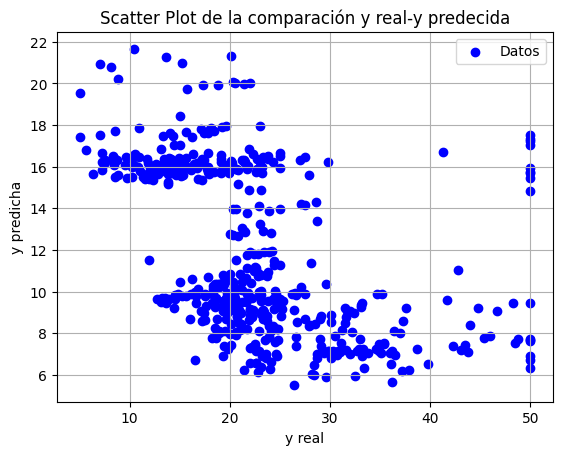

In [ ]:
# Comparación entre los datos reales y la predicción del modelo
x = y_train  # variable objetivo real
y = prediccion(X_train, w_final, b_final) # Predicción del modelo

# Crear el scatter plot
plt.scatter(x, y, color='blue', marker='o', label='Datos')

# Añadir etiquetas y título al gráfico
plt.xlabel('y real')
plt.ylabel('y predicha')
plt.title('Scatter Plot de la comparación y real-y predecida')
plt.legend()  # Mostrar la leyenda si es necesario
plt.grid(True)
plt.show()


# **Créditos**
---

**Docente:** Nicolás Castillo Ojeda

**Universidad Pedagógica y Tecnológica de Colombia** - *Diplomado en Data Science - Cohorte I - 2024*


---